In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
!cp "/content/gdrive/My Drive/Covid-19 Dataset/keras-covid-19.zip" "/content/"
!unzip keras-covid-19.zip -d "/content/dataset"
!cp  -r "/content/dataset/keras-covid-19/dataset" "/content/main/"


Archive:  keras-covid-19.zip
   creating: /content/dataset/keras-covid-19/
  inflating: /content/dataset/keras-covid-19/build_covid_dataset.py  
  inflating: /content/dataset/keras-covid-19/covid19.model  
   creating: /content/dataset/keras-covid-19/dataset/
   creating: /content/dataset/keras-covid-19/dataset/covid/
  inflating: /content/dataset/keras-covid-19/dataset/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg  
  inflating: /content/dataset/keras-covid-19/dataset/covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg  
  inflating: /content/dataset/keras-covid-19/dataset/covid/1-s2.0-S0929664620300449-gr2_lrg-b.jpg  
  inflating: /content/dataset/keras-covid-19/dataset/covid/1-s2.0-S0929664620300449-gr2_lrg-c.jpg  
  inflating: /content/dataset/keras-covid-19/dataset/covid/1-s2.0-S0929664620300449-gr2_lrg-d.jpg  
  inflating: /content/dataset/keras-covid-19/dataset/covid/auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: /content/dataset/keras-covid-19/datas

In [0]:
import os

In [0]:
covid_infected=os.listdir("/content/main/covid")
normal_lungs=os.listdir("/content/main/normal")


In [0]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix

In [14]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(2,activation='softmax')(x)

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [0]:
model=Model(inputs=base_model.input,outputs=preds)


In [0]:
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [20]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128 

In [29]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator=train_datagen.flow_from_directory('./main/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

test_generator=test_datagen.flow_from_directory('./test/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)


Found 40 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [40]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
step_size_train=train_generator.n//train_generator.batch_size
history = model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   validation_data=test_generator,
                   epochs=30)

Epoch 1/30
1/1 [==============================] - 5s 5s/step - loss: 0.0259 - accuracy: 1.0000 - val_loss: 0.4435 - val_accuracy: 0.9000
Epoch 2/30
1/1 [==============================] - 0s 297ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 1.1616e-04 - val_accuracy: 1.0000
Epoch 3/30
1/1 [==============================] - 0s 422ms/step - loss: 1.0431e-07 - accuracy: 1.0000 - val_loss: 3.1113e-06 - val_accuracy: 1.0000
Epoch 4/30
1/1 [==============================] - 1s 745ms/step - loss: 5.3765e-04 - accuracy: 1.0000 - val_loss: 0.1678 - val_accuracy: 0.9000
Epoch 5/30
1/1 [==============================] - 0s 489ms/step - loss: 0.3125 - accuracy: 0.8750 - val_loss: 0.1313 - val_accuracy: 0.9000
Epoch 6/30
1/1 [==============================] - 1s 684ms/step - loss: 1.2020e-04 - accuracy: 1.0000 - val_loss: 0.0441 - val_accuracy: 1.0000
Epoch 7/30
1/1 [==============================] - 1s 513ms/step - loss: 2.2330 - accuracy: 0.7500 - val_loss: 3.7950 - val_accuracy: 0.9000
Epo

In [0]:
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

In [52]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [54]:
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report', classification_report(test_generator.classes,y_pred))

Confusion Matrix
[[0 5]
 [0 5]]
Classification Report               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.50      1.00      0.67         5

    accuracy                           0.50        10
   macro avg       0.25      0.50      0.33        10
weighted avg       0.25      0.50      0.33        10



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Accuracy Curves')

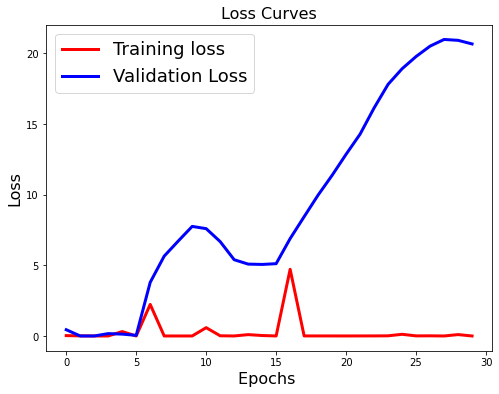

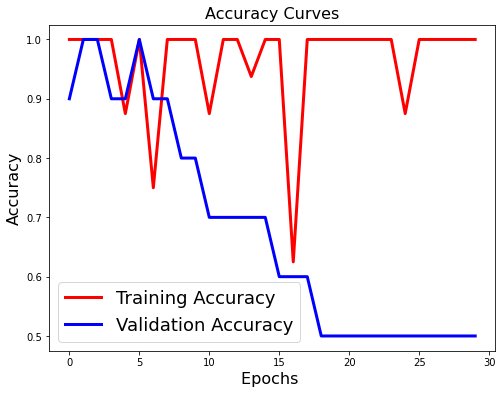

In [55]:

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [0]:
model.save("transfer_learning.h5")

In [0]:
!cp "/content/transfer_learning.h5" "/content/gdrive/My Drive/covid/"